### This notebook is exactly the same as part 3, except from the parts that I will mark.
Monitoring the training process via a long list of printed values is extremely inpractical.
For visualizing the training process we will use TensorBoard.

In [1]:
import tensorflow as tf
import numpy as np

### Example
As an example we will try to learn the following function
$$t = x^2$$

### Datasets

In [2]:
# First we need do create the dataset. 
training_data = [[1.0], [3.0], [4.0], [8.0]]
training_labels = [[2.0], [6.0], [8.0], [16.0]]
validation_data = [[5.0]]
validation_labels = [[10.0]]

# Before you start using tf functions it's useful to reset the graph. If you have to rerun cells start
# with the first cell, in which you reset.
tf.reset_default_graph()

# Now we use the tf.data library to create a proper dataset that we can work with.
training_dataset = tf.data.Dataset.from_tensor_slices((training_data, training_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_data, validation_labels))

# This allows us to directly define batchsize we want to use.
training_batch_size = 2
validation_batch_size = 1
training_dataset = training_dataset.batch(training_batch_size)
validation_dataset = validation_dataset.batch(validation_batch_size)

# Shuffle the training data in each epoch.
training_dataset = training_dataset.shuffle(buffer_size=4, reshuffle_each_iteration=True)

### Iterator 

In [3]:
# Next we need an iterator which will allow us to iterate throught the dataset.
iterator = tf.data.Iterator.from_structure(training_dataset.output_types,
                                           training_dataset.output_shapes)

# We can easily access different properties of the dataset.
print(training_dataset.output_types)
print(training_dataset.output_shapes)

# There is a method that returns always the next element from the iterator.
# Let's give it a name.
next_batch = iterator.get_next()

# Later on we also need to initialize the iterator and load a dataset into it.
training_init_op = iterator.make_initializer(training_dataset)
validation_init_op = iterator.make_initializer(validation_dataset)

(tf.float32, tf.float32)
(TensorShape([Dimension(None), Dimension(1)]), TensorShape([Dimension(None), Dimension(1)]))


### Model

In [4]:
# Now we can already proceed and design our model.



# The output of the iterator.get_next() method will return a list
# with the first entry being the input data and the second being the labels of the batch.
input_data = next_batch[0]
labels = next_batch[1]

# You can print the shapes of tensors!
print(input_data.shape)

# As our model is only simply linear function we only need one weight to approximate it.
weight = tf.Variable(0.5, dtype=tf.float32)
output = input_data * weight

# Now we need to define the loss that we want to minimize. We use Mean Squared Error
mse = 0.5 * tf.reduce_sum(tf.square(labels - output))
loss = tf.reduce_mean(mse)

# Last but not least we need the optimizer that minimizes our loss.
# For this we need first a learning rate.
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
# And tell the optimizer what iat should optimize.
training_step = optimizer.minimize(loss)

### This part is new!
### Summaries

In [5]:
# After defining your model you can add so called summaries for all values you want to monitor.
tf.summary.scalar('loss', loss)
# ...

# In the end you merge all summaries.
merged_summaries = tf.summary.merge_all()

# Then you define a filewriter and specify a folder where your values should be stored.
# You need two. One for training and one for validation.
train_writer = tf.summary.FileWriter('./summaries/train/')
validation_writer = tf.summary.FileWriter('./summaries/validation/')

### Training

In [6]:
# Define for how many epochs you want to train.
epochs = 1000

# Let's train our model.
with tf.Session() as sess:
    
    # First initialize the variables.
    sess.run(tf.global_variables_initializer())
    # We need a step counter.
    global_step = 0
    
    # Now we set up a loop that will run until we finished all epochs.
    for _ in range(epochs):
        
        # TRAINING
        # Load the training data into the iterator.
        sess.run(training_init_op)
        
        # In each epoch we want to go through all batches of the training data. 
        while True:
            try:
                ####################################################
                ########## NEW #####################################
                # Instead of the value we read out the summary.
                _, summary  = sess.run((training_step, merged_summaries))
                # We write the summary into our folder.
                train_writer.add_summary(summary, global_step)
                ####################################################
                
                # Update the step counter.
                global_step += 1
                
            # Breakout of the loop if we looked at all batches
            except tf.errors.OutOfRangeError:
                break
                
                
        # VALIDATION
        # Load the validation data into the iterator.
        sess.run(validation_init_op)
        # Usually we can put all of the validation data in one batch. We don't need a loop here!
        #####################################################
        ############# SAME HERE #############################
        summary = sess.run((merged_summaries))
        validation_writer.add_summary(summary, global_step)
        #####################################################
        
                
    

### TensorBoard
There is now a folder where the summaries are stored in.
Run the following command in your command line:

    tensorboard --logdir='./summaries'
    
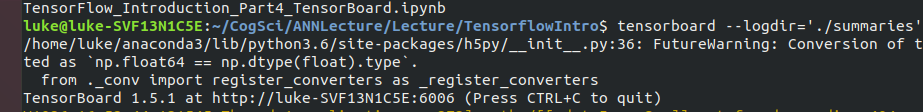

Open the link specified in your terminal.

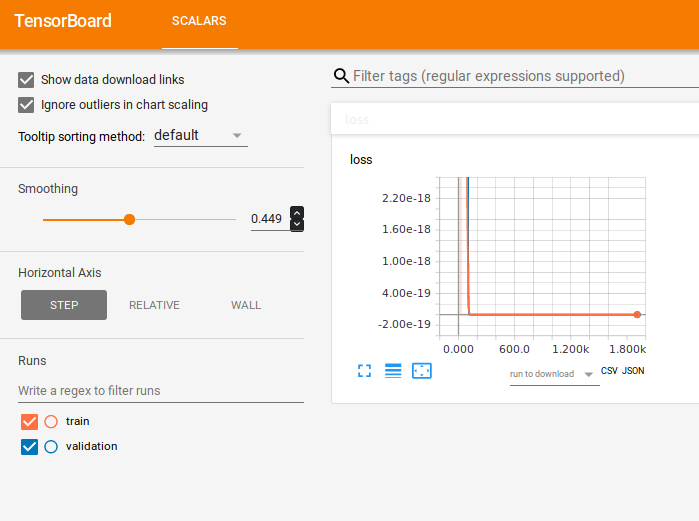

    





